### Importing Librearies

In [280]:
import pandas as pd
import numpy as np
#Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
# Model Building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Model Evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

In [281]:
data = pd.read_csv(r"C:\Users\admine\Downloads\Lead Scoring Assignment\Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Understanding

In [283]:
data.shape

(9240, 37)

In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [285]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [286]:
data.isnull().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

#### Data Preparation

In [288]:
#dropping Lead Number and Prospect ID since they have all unique values
data = data.drop(['Prospect ID', 'Lead Number'], axis = 1)

In [289]:
# As the Lead Quality depends upons the intuition of the employee, it will be safer to update the NaN to "Not Sure"

data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')

In [290]:
# converting all the Select columns into Nans that columns like Specialization, How did you hear about X Education,Lead Profile
data = data.replace('Select',np.nan)
data.isnull().mean()

Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
How did you hear about X Education               0.784632
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

In [291]:
# Missing values
# Dropping columns morethan 45%
morethan_45 = ['How did you hear about X Education','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
data = data.drop( morethan_45, axis = 1)
data.isnull().mean()

Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [292]:
#Replacing the null values with mode of the column
data['Specialization'] = data['Specialization'].replace(np.nan, data['Specialization'].mode()[0])
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, data['What is your current occupation'].mode()[0])
data['Tags'] = data['Tags'].replace(np.nan, data['Tags'].mode()[0])
data['City'] = data['City'].replace(np.nan, data['City'].mode()[0])
data['Country'] = data['Country'].replace(np.nan, data['Country'].mode()[0])
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, data['What matters most to you in choosing a course'].mode()[0])
data.isnull().mean()

Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [293]:
# Dropping the rows which are lessthan 2% Lead Source,TotalVisits,Page Views Per Visit,Last Activity 
data = data.dropna()
data.isnull().mean()

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

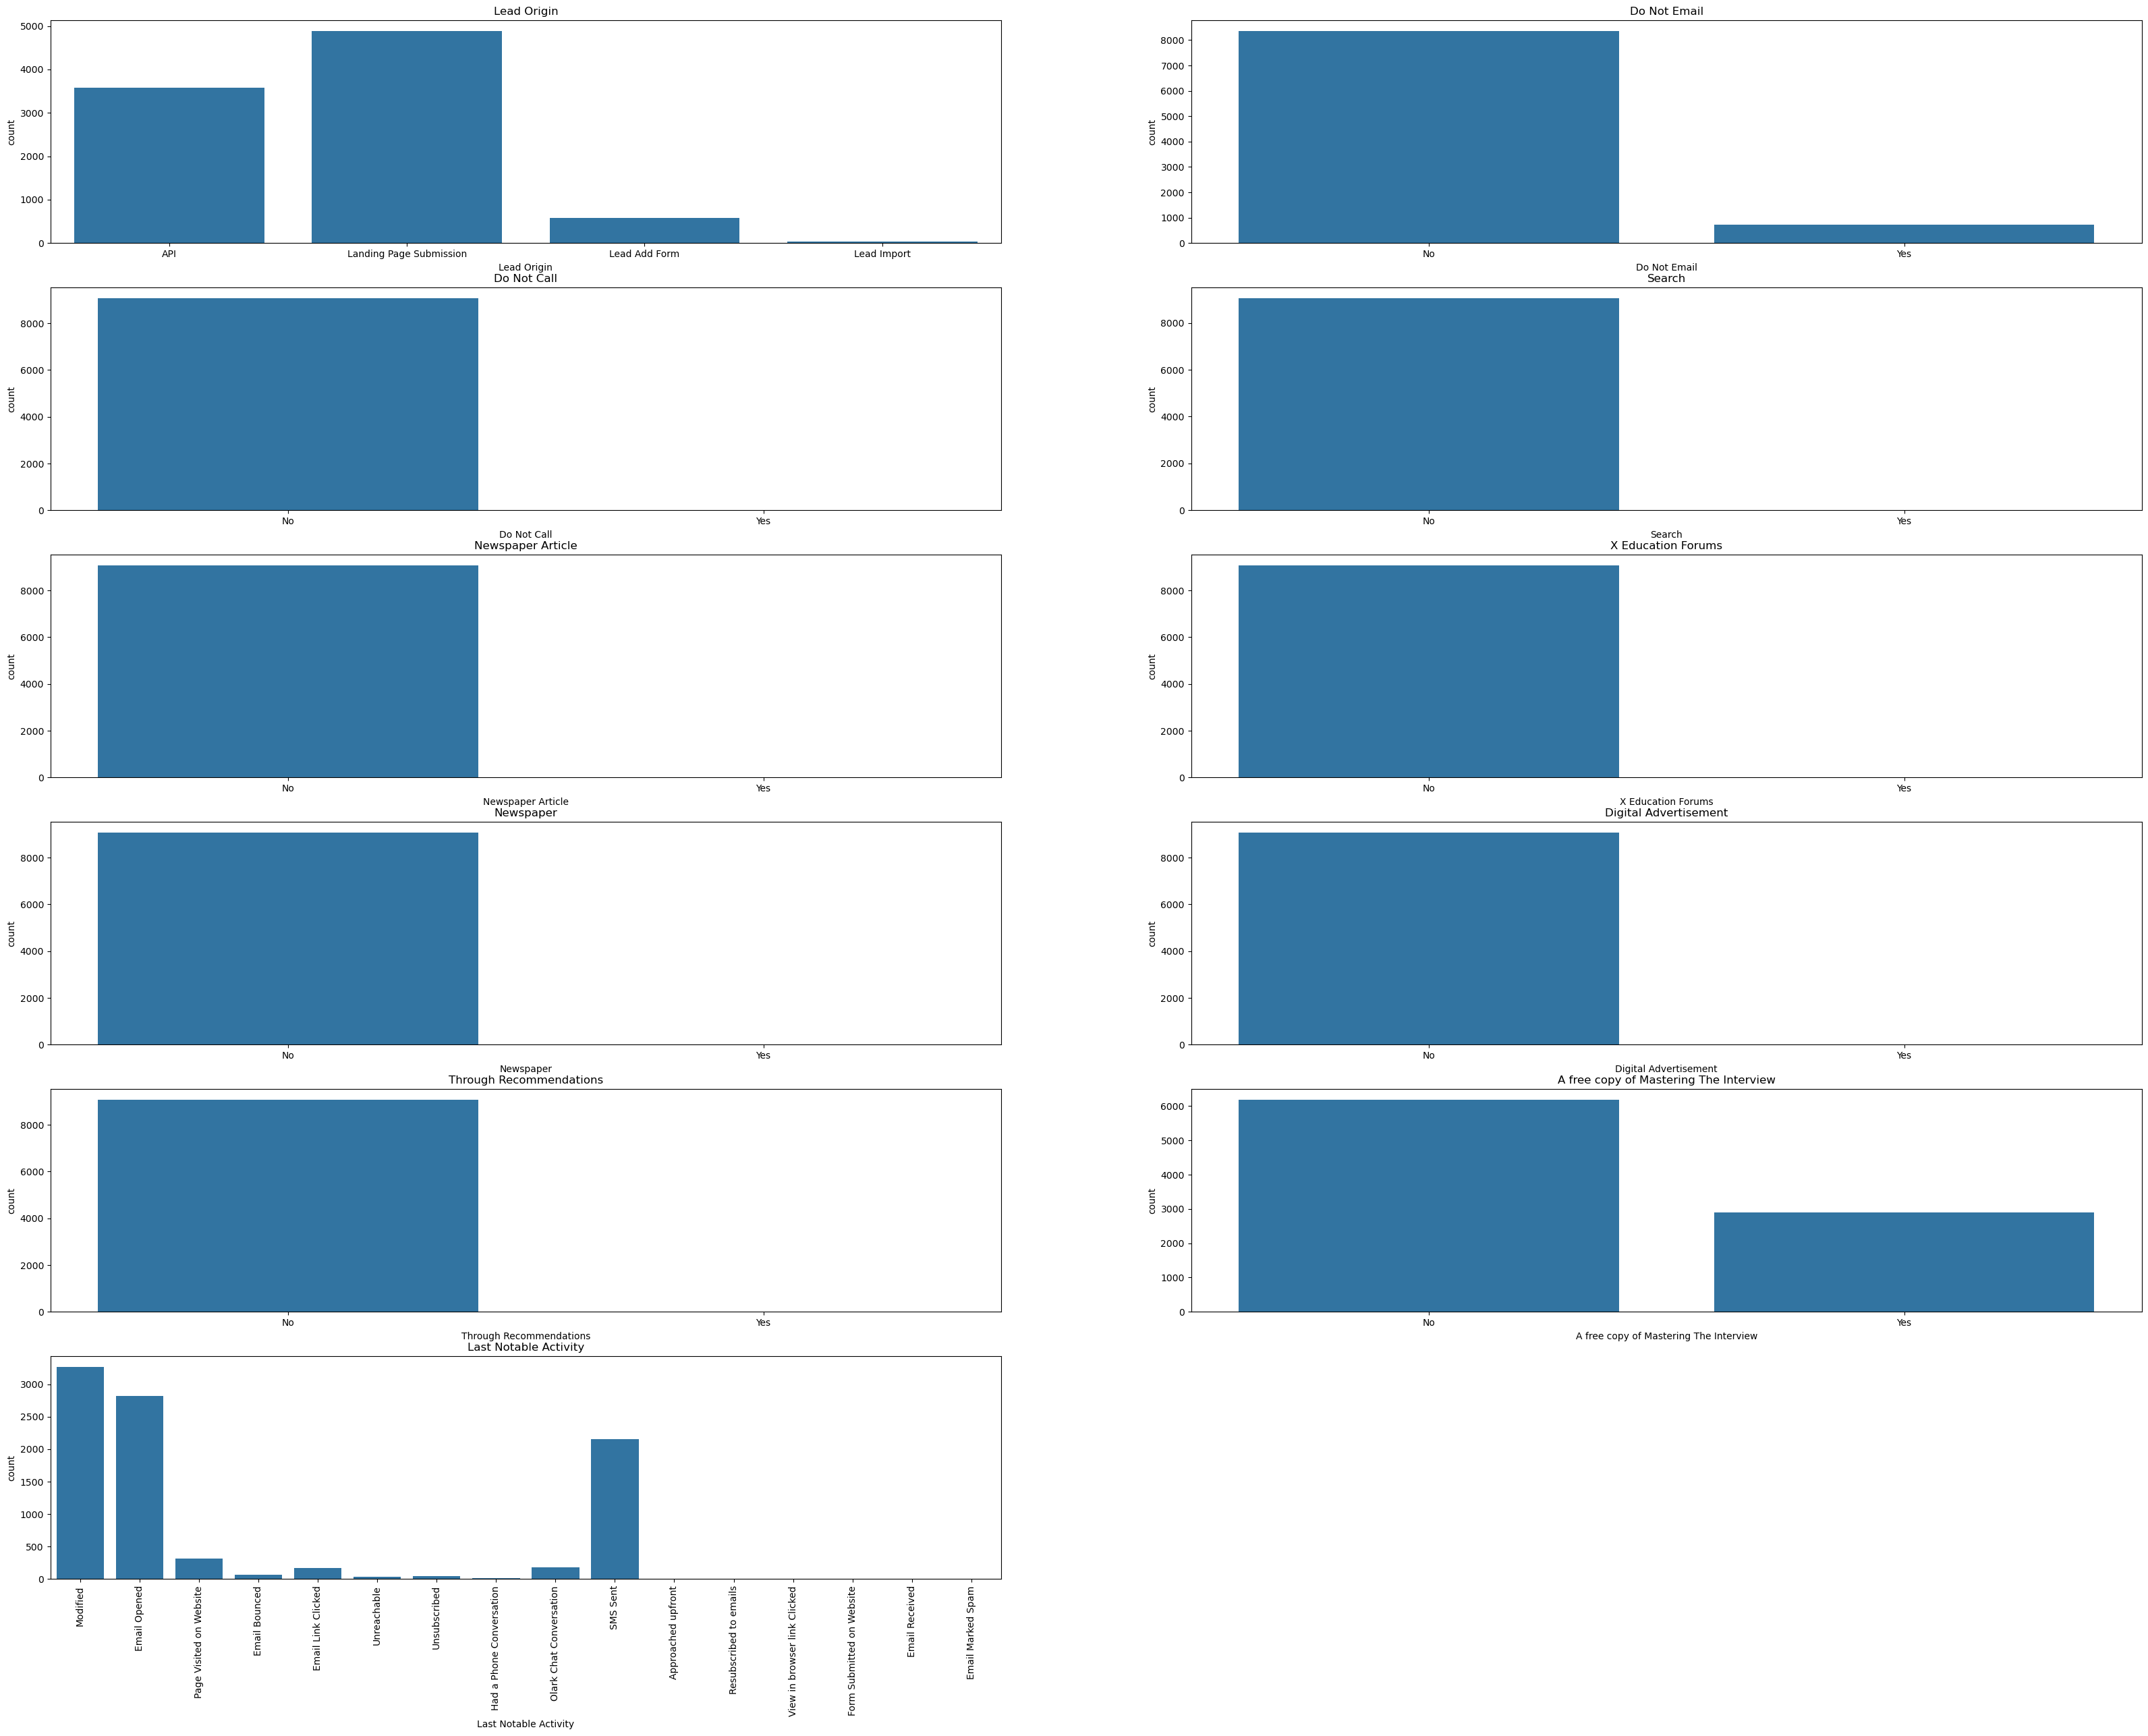

In [294]:
columns = ['Lead Origin', 'Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Last Notable Activity']
plt.figure(figsize=(40,30))
for i, col in enumerate(columns, 1):
    plt.subplot(6, 2, i)  
    sns.countplot(data=data, x=col)
    plt.title(col)
    if col == 'Last Notable Activity':
        plt.xticks(rotation=90)
plt.show()

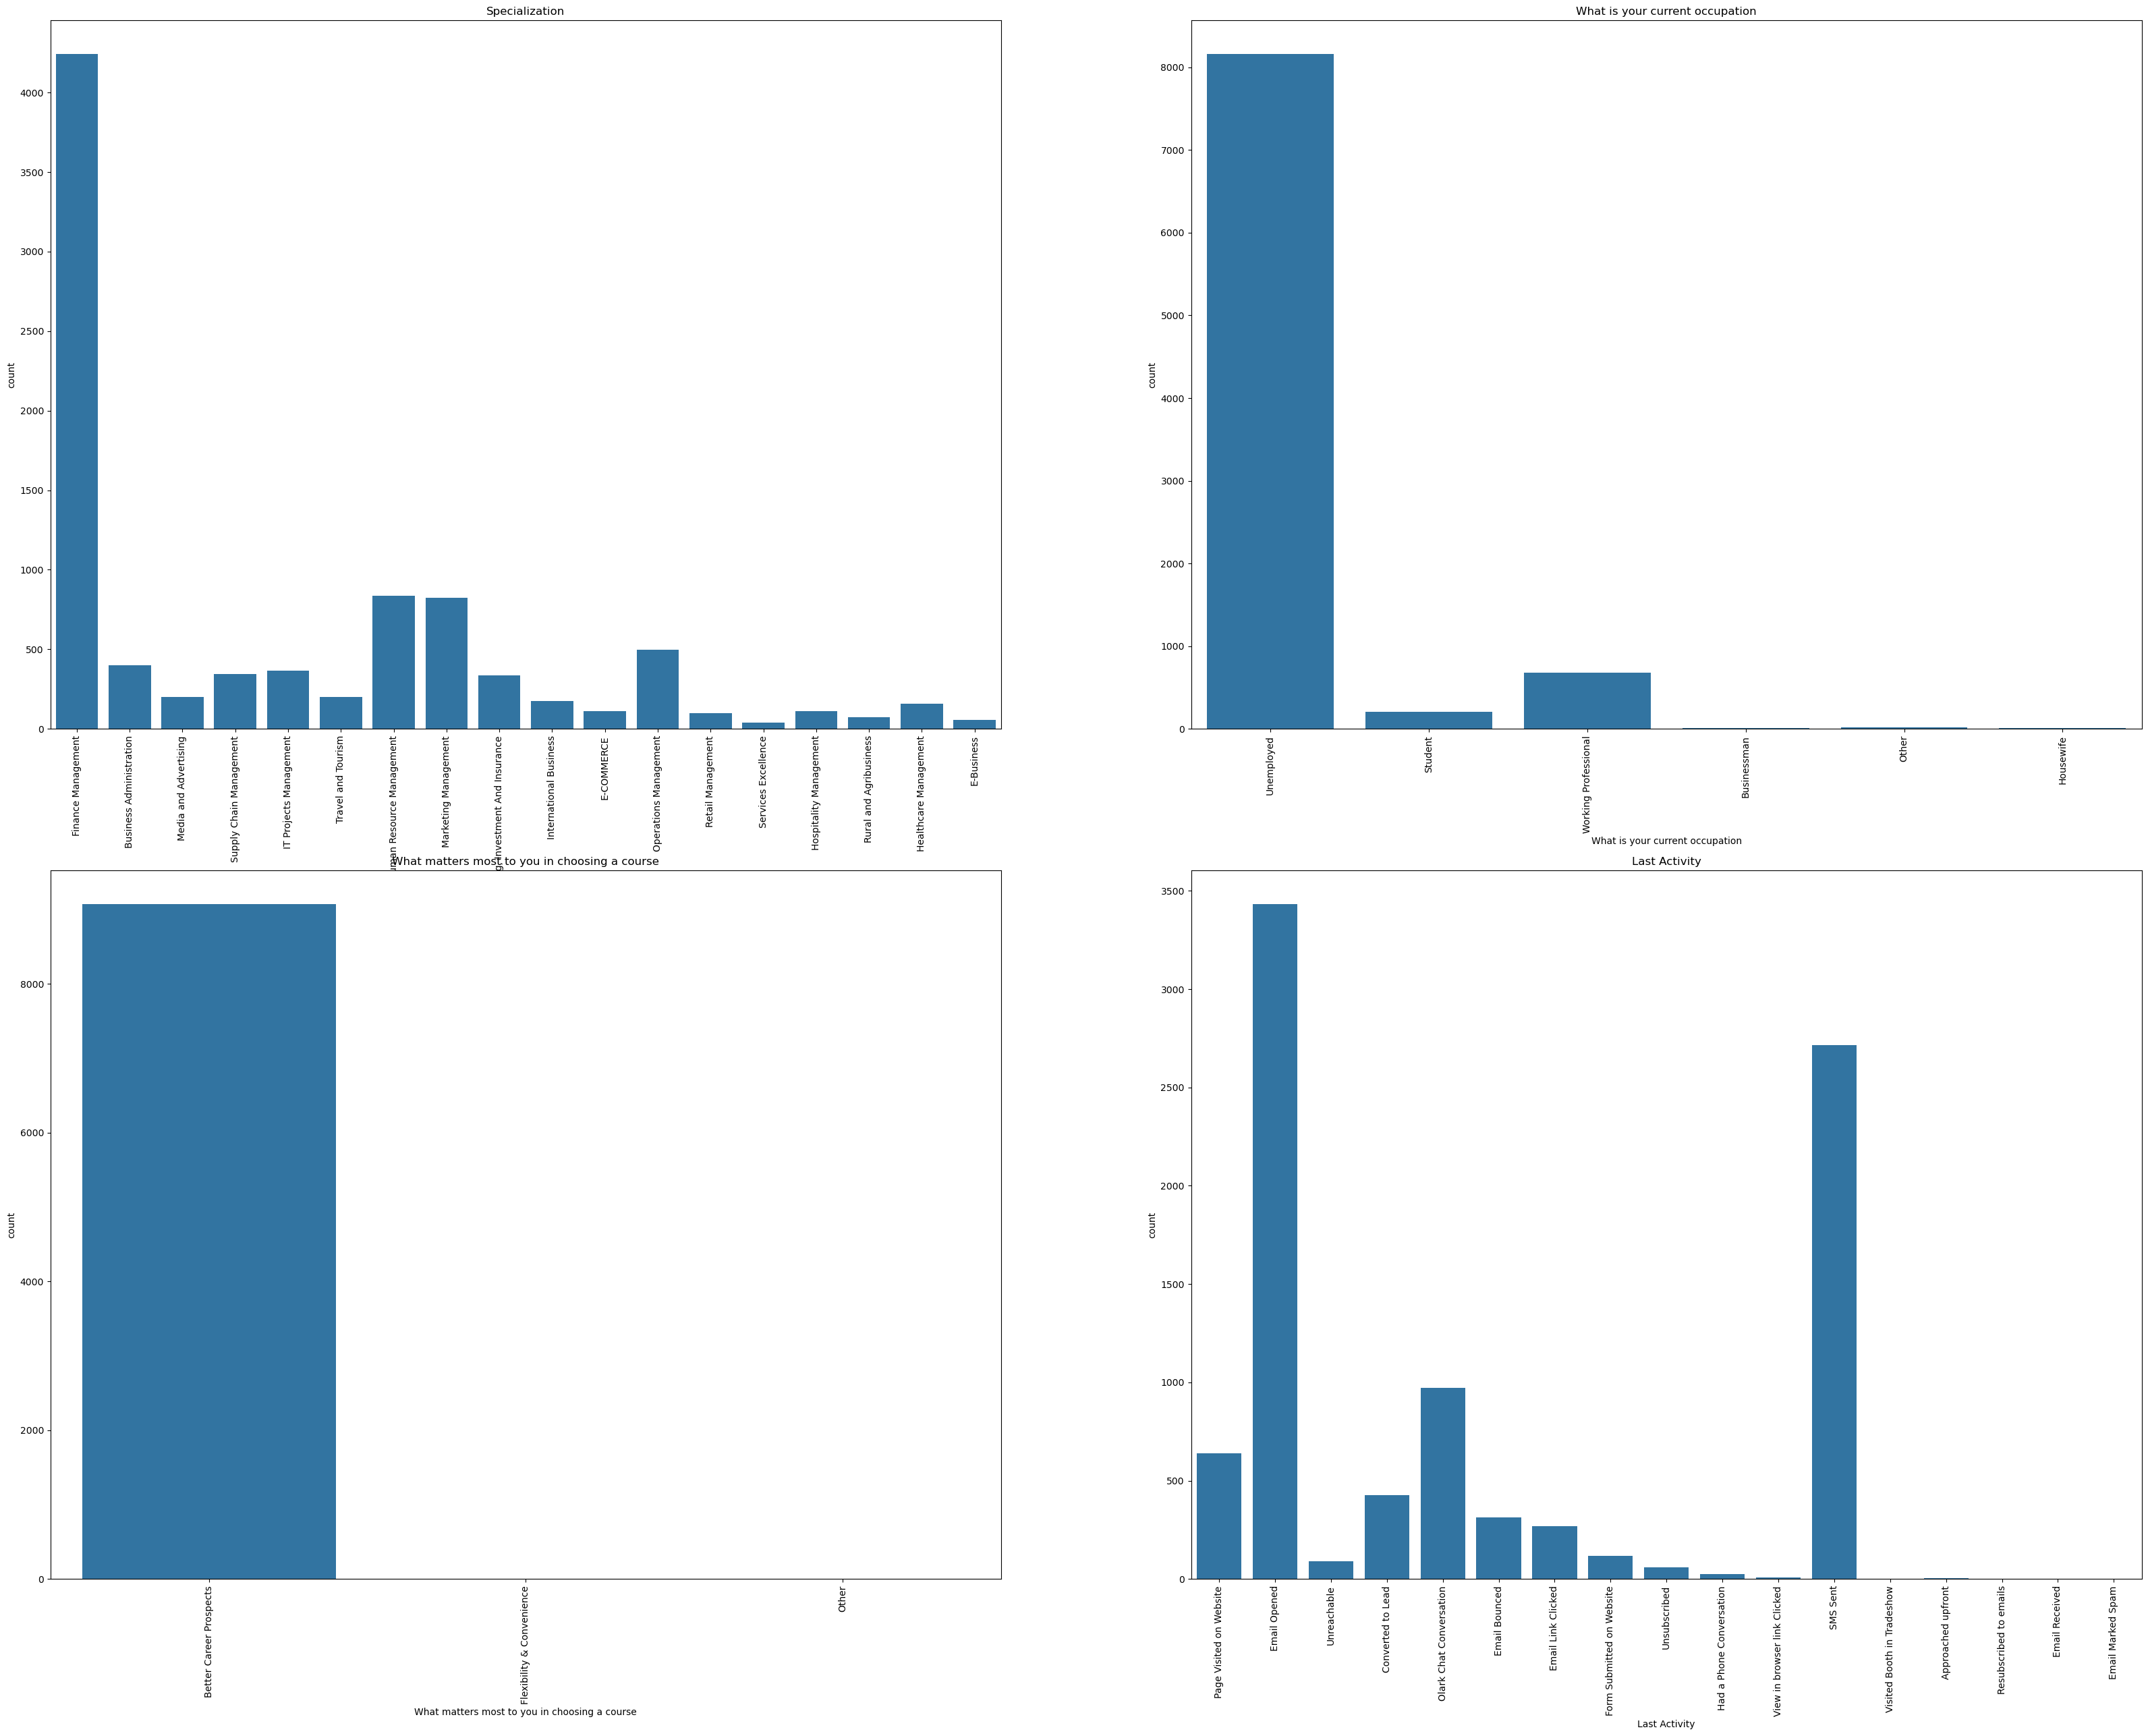

In [295]:
columns = ['Specialization', 'What is your current occupation', 'What matters most to you in choosing a course','Last Activity']
plt.figure(figsize=(40, 30))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  
    sns.countplot(data=data, x=col)
    plt.xticks(rotation=90) 
    plt.title(col)  
plt.show()

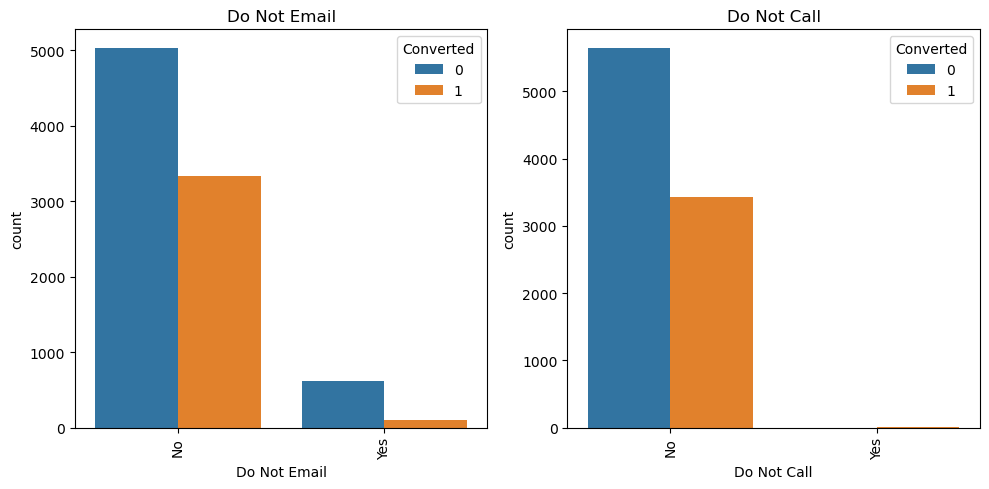

In [296]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
s1 = sns.countplot(x='Do Not Email', hue='Converted', data=data)
s1.tick_params(axis='x', rotation=90)
plt.title('Do Not Email')
plt.subplot(1, 2, 2)
s2 = sns.countplot(x='Do Not Call', hue='Converted', data=data)
s2.tick_params(axis='x', rotation=90) 
plt.title('Do Not Call')
plt.tight_layout()
plt.show()

In [297]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(data[['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']], drop_first=True).astype(np.int64)
# Adding the results to the master dataframe
data = pd.concat([data, dummy], axis=1)
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity,Do Not Email_Yes,Do Not Call_Yes,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,Modified,0,0,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Email Opened,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Email Opened,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Modified,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Modified,0,0,0,0,0,0,0,0,0


In [298]:
data = data.drop(['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','What matters most to you in choosing a course'],axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Lead Origin                                 9074 non-null   object 
 1   Lead Source                                 9074 non-null   object 
 2   Converted                                   9074 non-null   int64  
 3   TotalVisits                                 9074 non-null   float64
 4   Total Time Spent on Website                 9074 non-null   int64  
 5   Page Views Per Visit                        9074 non-null   float64
 6   Last Activity                               9074 non-null   object 
 7   Country                                     9074 non-null   object 
 8   Specialization                              9074 non-null   object 
 9   What is your current occupation             9074 non-null   object 
 10  Tags             

In [299]:
# We can clearly observe that the count of leads from various sources are close to negligible and hence we can club them into "Others" source for better visualisation and analysis
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Lead_Source')
data['Lead Source'] = data['Lead Source'].replace("google", 'Google')
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront','Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)','Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch','Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized'], 'Other_Tags')
data['Country'] = data['Country'].replace(['United States','United Arab Emirates','Singapore','Saudi Arabia','United Kingdom','Australia','Qatar','Hong Kong','Bahrain','Oman','France','unknown','South Africa','Nigeria','Germany','Kuwait','Canada','Sweden','China','Asia/Pacific Region','Uganda','Bangladesh','Italy','Belgium','Netherlands','Ghana','Philippines','Russia','Switzerland','Vietnam','Denmark','Tanzania','Liberia','Malaysia','Kenya','Sri Lanka','Indonesia'],'Other_Countries')

In [300]:
for col in data.iloc[:,1:].select_dtypes(include='object').columns:
    print("-----------------------------------------------")
    print(data[col].value_counts(normalize = True)*100)

-----------------------------------------------
Lead Source
Google               31.661891
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
Other_Lead_Source     0.253471
Name: proportion, dtype: float64
-----------------------------------------------
Last Activity
Email Opened                 37.822350
SMS Sent                     29.931673
Olark Chat Conversation      10.711924
Page Visited on Website       7.053119
Converted to Lead             4.716773
Email Bounced                 3.438395
Email Link Clicked            2.942473
Form Submitted on Website     1.278378
Unreachable                   0.991845
Unsubscribed                  0.650209
Other Activity                0.462861
Name: proportion, dtype: float64
-----------------------------------------------
Country
India              96.837117
Other_Countries    

In [301]:
data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,...,Last Notable Activity,Do Not Email_Yes,Do Not Call_Yes,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,...,Modified,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,...,Email Opened,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,...,Email Opened,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,...,Modified,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,...,Modified,0,0,0,0,0,0,0,0,0


### Exploratory Data Analysis

In [303]:
data['Converted'].value_counts(normalize = True)*100

Converted
0    62.144589
1    37.855411
Name: proportion, dtype: float64

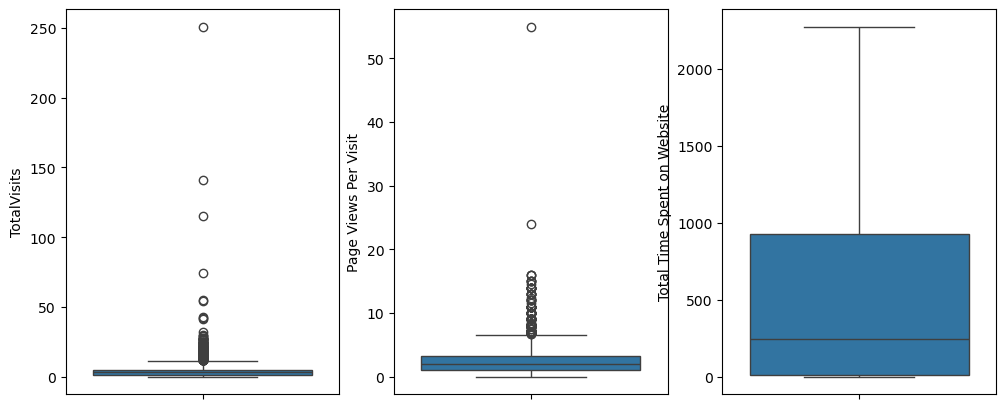

In [304]:
# Univarient Analysis
plt.figure(figsize=(12,5))
plt.subplot(1, 3, 1)
sns.boxplot(y=data['TotalVisits'])
plt.subplot(1, 3, 2)
sns.boxplot(y=data['Page Views Per Visit'])
plt.subplot(1, 3, 3)
sns.boxplot(y=data['Total Time Spent on Website'])
plt.show()

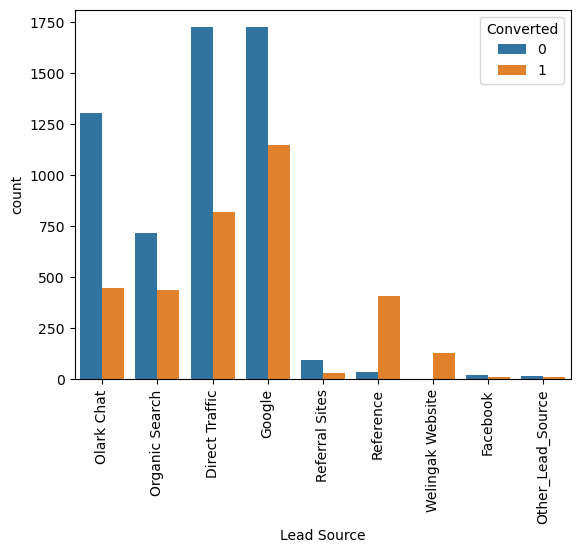

In [305]:
# Bivarient Analysis
# Plotting Lead Source again
sns.countplot(x="Lead Source", hue="Converted", data= data)
plt.xticks(rotation='vertical')
plt.show()

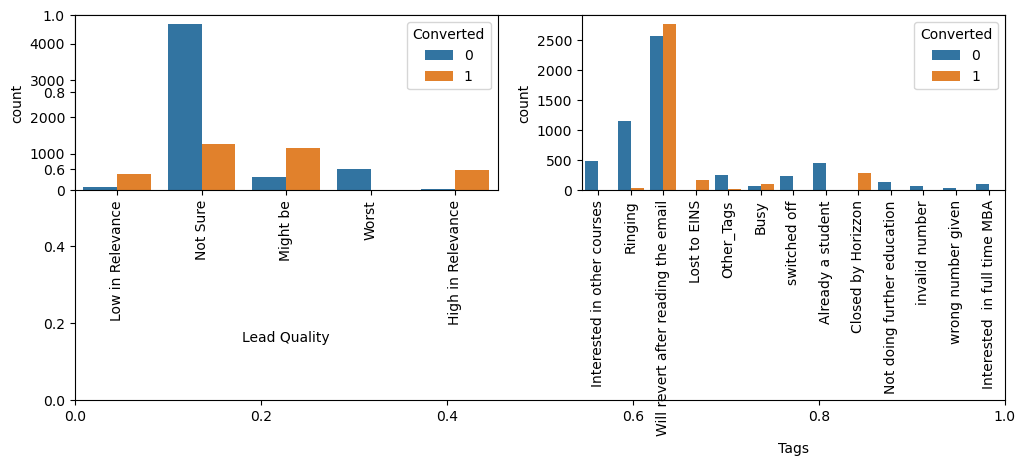

In [306]:
fig=plt.subplots(figsize=(12, 5))
plt.subplot(2, 2,1)
sns.countplot(x='Lead Quality', hue="Converted", data=data)
plt.xticks( rotation='vertical')
plt.subplot(2, 2,2)
sns.countplot(x='Tags', hue="Converted", data=data)
plt.xticks( rotation='vertical')
plt.show()

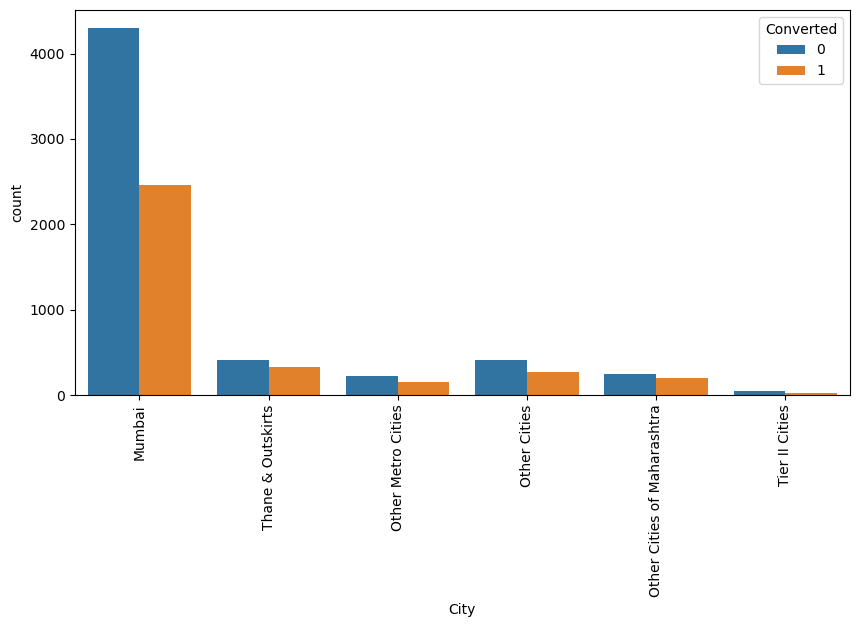

In [307]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='City', hue='Converted')
plt.xticks(rotation=90)
plt.show()

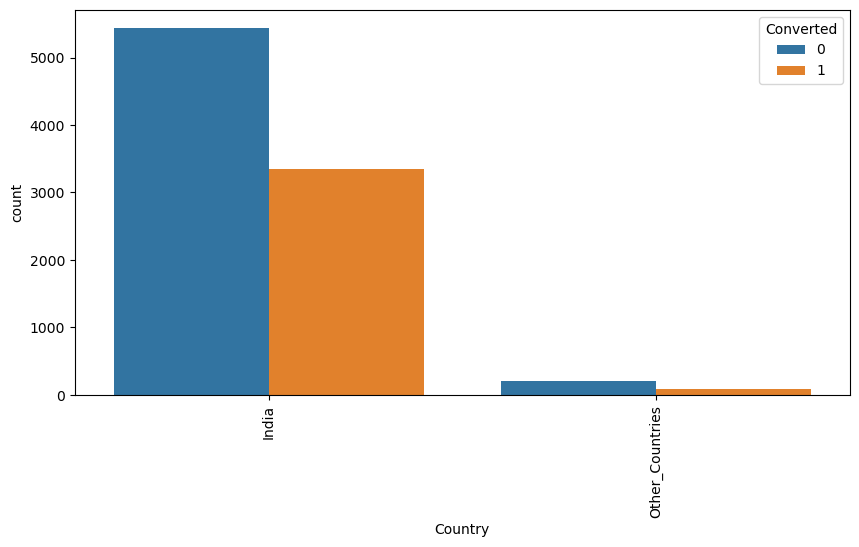

In [308]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Country', hue='Converted')
plt.xticks(rotation=90)
plt.show()

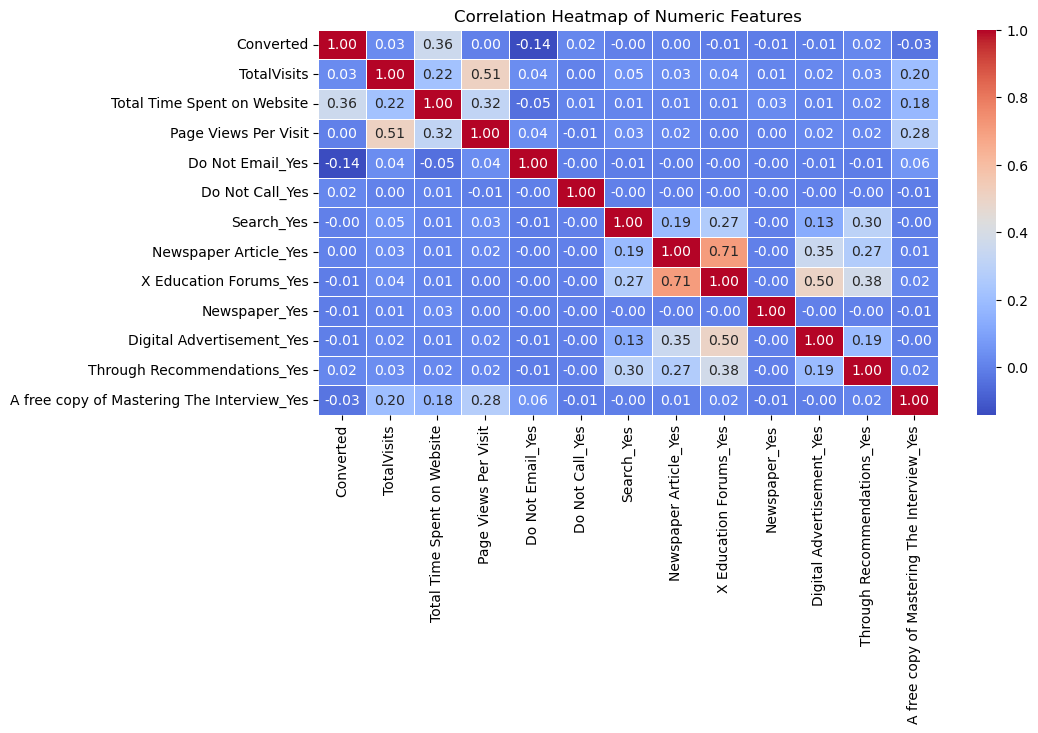

In [309]:
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

<Figure size 3000x1200 with 0 Axes>

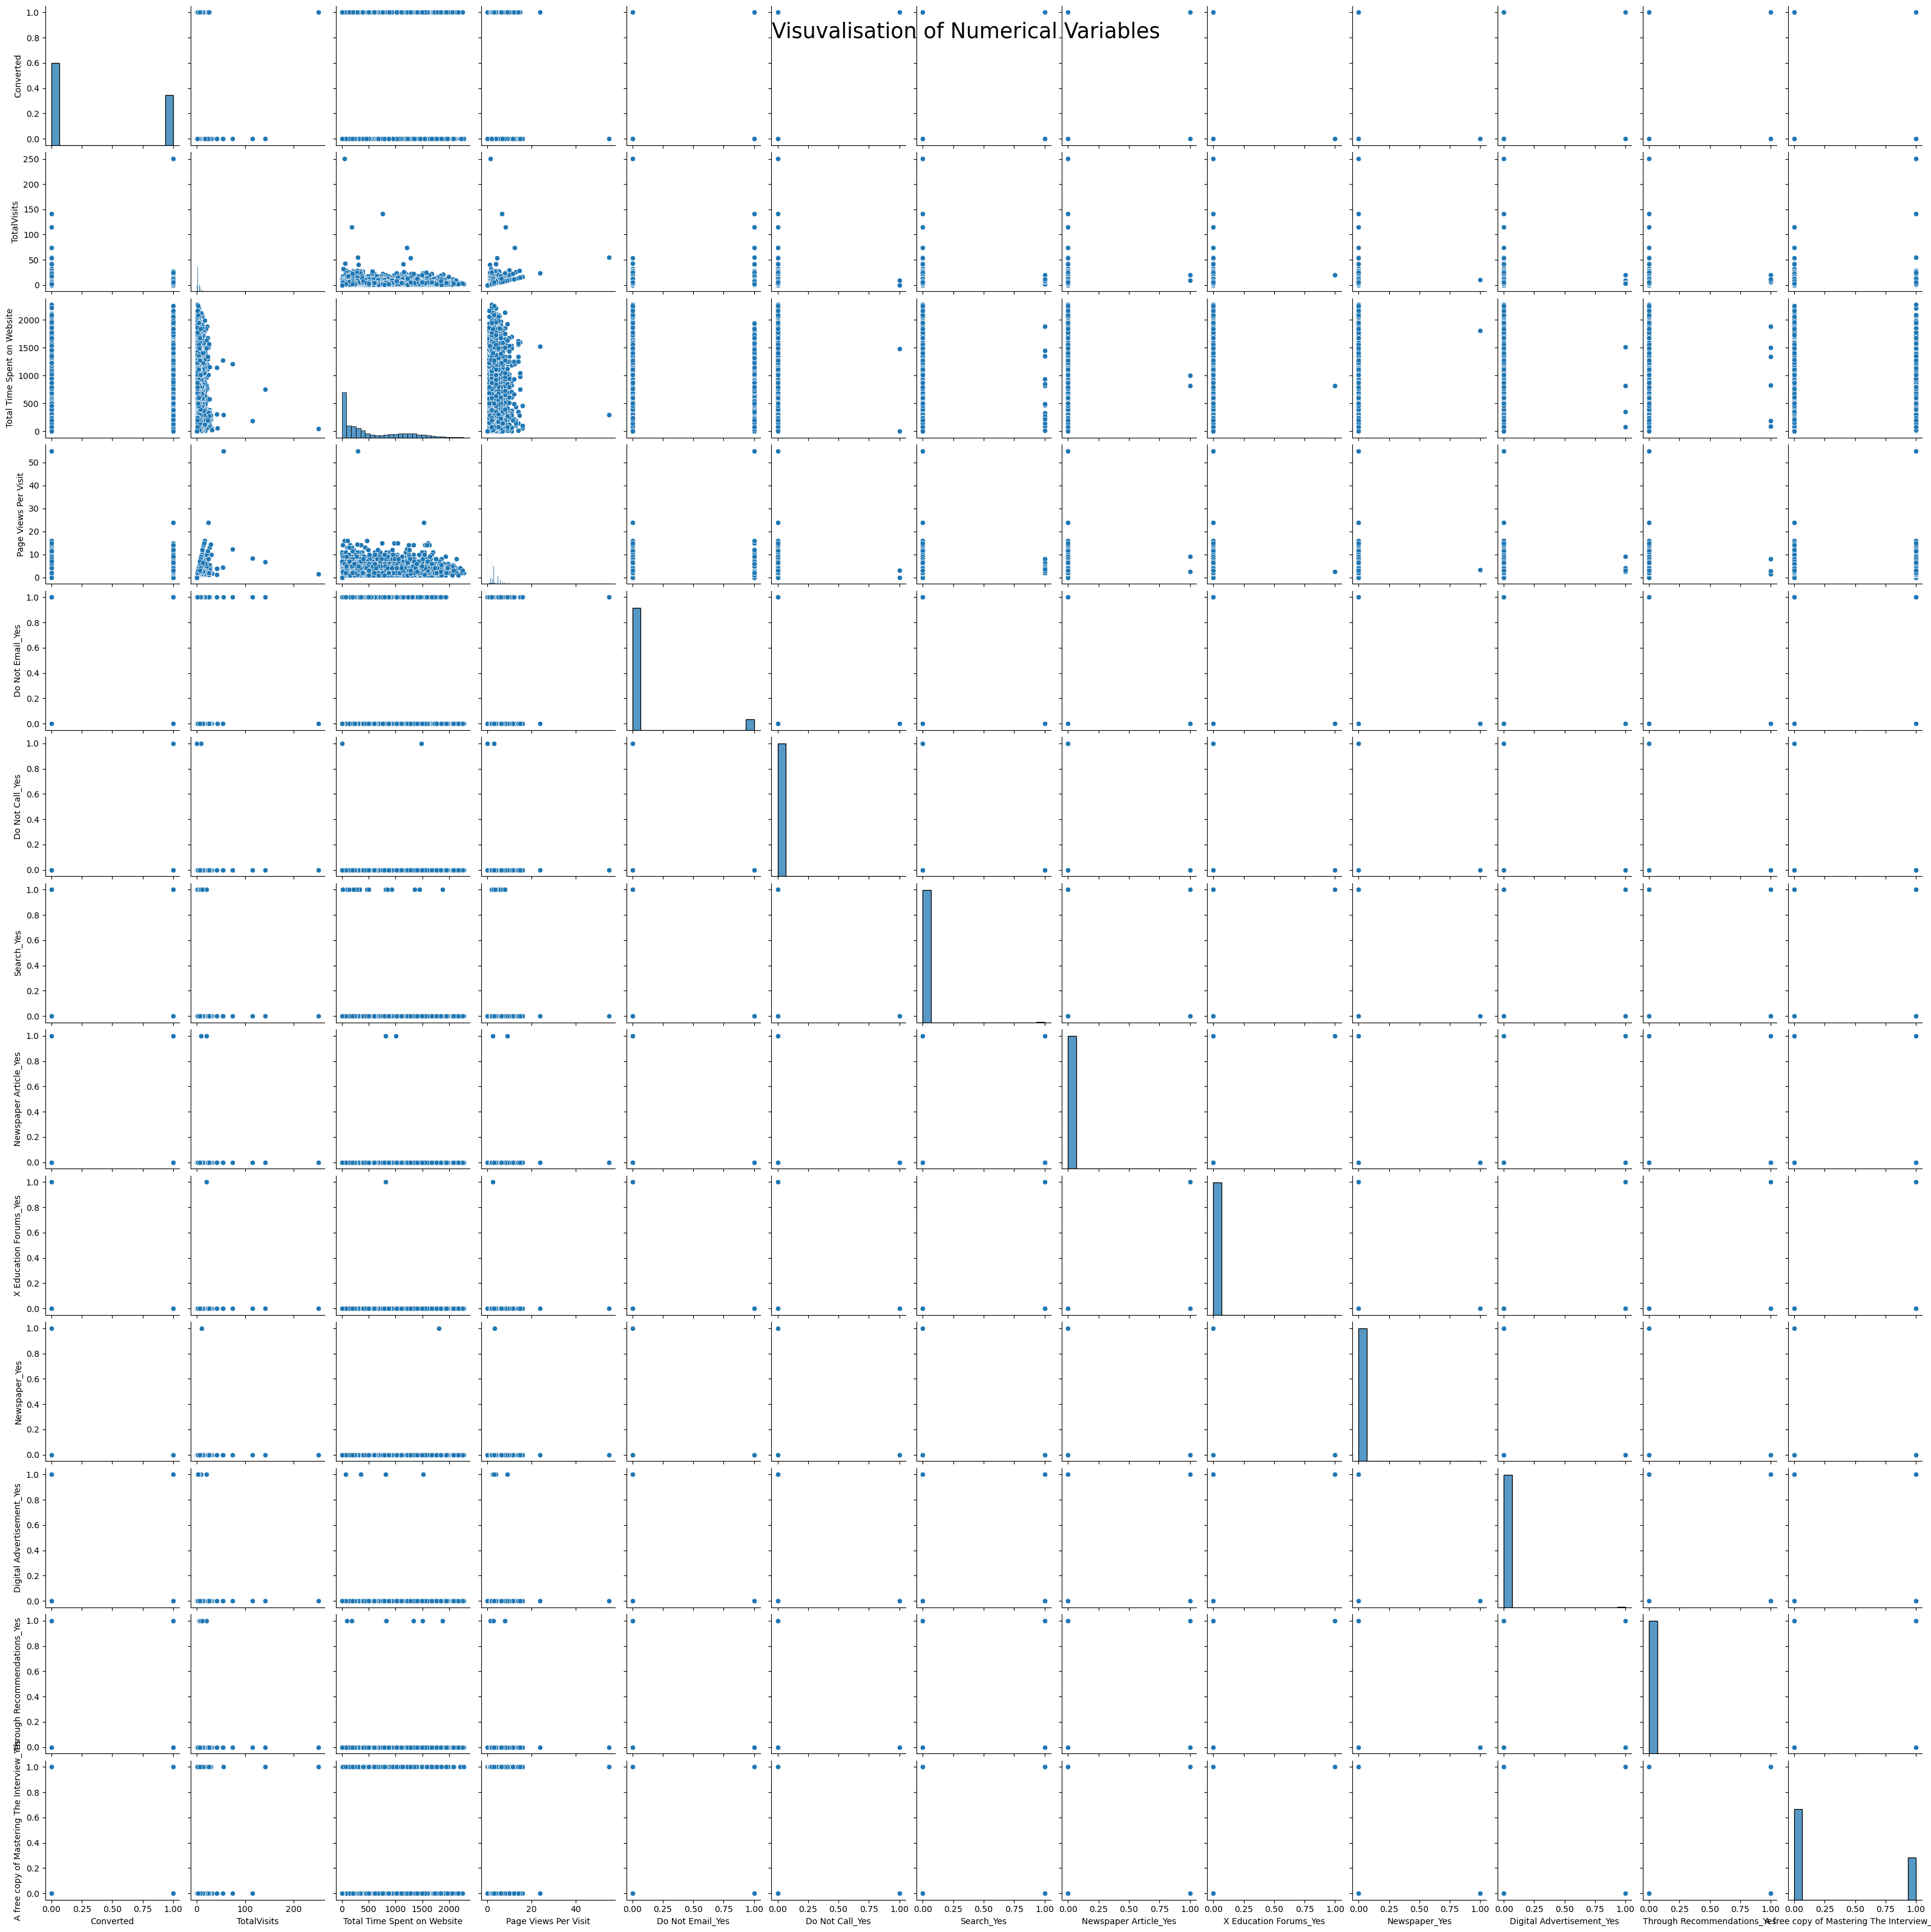

In [310]:
#Multivarient Analysis
#Visuvalisation of Numerical Variables
plt.figure(figsize=(30,12))
sns.pairplot(data)
plt.suptitle('Visuvalisation of Numerical Variables',fontsize=25)
plt.show()

### Data Preparation

In [312]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable Lead Origin
lo = pd.get_dummies(data['Lead Origin'], prefix='Lead Origin',drop_first = True).astype(np.int64)
#Adding the results to the master dataframe
data = pd.concat([data,lo], axis=1)

# Creating dummy variables for the variable Lead Source
ls = pd.get_dummies(data['Lead Source'], prefix='Lead Source',drop_first = True).astype(np.int64)
#Adding the results to the master dataframe
data = pd.concat([data,ls], axis=1)

# Creating dummy variables for the variable Last Activity
la = pd.get_dummies(data['Last Activity'], prefix='Last Activity',drop_first = True).astype(np.int64)
#Adding the results to the master dataframe
data = pd.concat([data,la], axis=1)

# Creating dummy variables for the variable Country
co = pd.get_dummies(data['Country'], prefix='Country',drop_first = True).astype(np.int64)
#Adding the results to the master dataframe
data = pd.concat([data,co], axis=1)

# Creating dummy variables for the variable City
c = pd.get_dummies(data['City'], prefix='City',drop_first = True).astype(np.int64)
#Adding the results to the master dataframe
data = pd.concat([data,c], axis=1)

# Creating dummy variables for the variable Lead Quality 
lq = pd.get_dummies(data['Lead Quality'], prefix='Lead Quality',drop_first = True).astype(np.int64)
#Adding the results to the master dataframe
data = pd.concat([data,lq], axis=1)

# Creating dummy variables for the variable What is your current occupation 
wo = pd.get_dummies(data['What is your current occupation'], prefix='What is your current occupation',drop_first = True).astype(np.int64)
#Adding the results to the master dataframe
data = pd.concat([data,wo], axis=1)

# Creating dummy variables for the variable Last Notable Activity
lna = pd.get_dummies(data['Last Notable Activity'], prefix='Last Notable Activity',drop_first = True).astype(np.int64)
#Adding the results to the master dataframe
data = pd.concat([data,lna], axis=1)

# Creating dummy variables for the variable Specialization
s = pd.get_dummies(data['Specialization'], prefix='Specialization',drop_first = True).astype(np.int64)
#Adding the results to the master dataframe
data = pd.concat([data,s], axis=1)

# Creating dummy variables for the variable Tags
t = pd.get_dummies(data['Tags'], prefix='Tags',drop_first = True).astype(np.int64)
#Adding the results to the master dataframe
data = pd.concat([data,t], axis=1)

In [313]:
data = data.drop(['Lead Origin','City','Lead Quality','Country','What is your current occupation','Lead Source','Last Notable Activity','Last Activity','Specialization','Tags'],axis = 1)
data.shape

(9074, 93)

### Model Building

In [315]:
scaler = StandardScaler()
data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform( data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_Yes,Do Not Call_Yes,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,...,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given
0,0,-0.711332,-0.885664,-1.096911,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0.317786,0.350519,0.060094,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,-0.299685,1.924177,-0.171307,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,-0.505508,-0.326263,-0.634109,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,-0.299685,1.733431,-0.634109,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [316]:
y = data['Converted']
x = data.drop(['Converted'],axis = 1)

In [317]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7, random_state = 100)

In [318]:
lr = LogisticRegression(class_weight='balanced')
rfe = RFE(estimator = lr, n_features_to_select = 15)
rfe = rfe.fit(x_train,y_train)

In [319]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 45),
 ('Total Time Spent on Website', False, 2),
 ('Page Views Per Visit', False, 51),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 41),
 ('Search_Yes', False, 34),
 ('Newspaper Article_Yes', False, 56),
 ('X Education Forums_Yes', False, 50),
 ('Newspaper_Yes', False, 74),
 ('Digital Advertisement_Yes', False, 55),
 ('Through Recommendations_Yes', False, 70),
 ('A free copy of Mastering The Interview_Yes', False, 37),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Source_Facebook', False, 57),
 ('Lead Source_Google', False, 61),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 59),
 ('Lead Source_Other_Lead_Source', False, 60),
 ('Lead Source_Reference', False, 78),
 ('Lead Source_Referral Sites', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 32),
 ('Last Activity_Email Link 

In [320]:
col = x_train.columns[rfe.support_]

In [321]:
x_train_sm = sm.add_constant(x_train[col])
lr1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = lr1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.6
Date:                Sun, 16 Feb 2025   Deviance:                       3161.3
Time:                        23:04:29   Pearson chi2:                 3.11e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5662
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8547      0.215     -8.636      0.000      -2.276      -1.434
Do Not Email_Yes                                        -1.3106      0.213     -6.154      0.000      -1.728      -0.893
Lead Origin_Lead Add Form                                1.0452      0.360      2.900      0.004       0.339       1.752
Lead Source_Welingak Website                             3.4638      0.817      4.238      0.000       1.862       5.066
Lead Quality_Not Sure                                   -3.3496      0.129    -26.033      0.000      -3.602      -3.097
Lead Quality_Worst                                      -3.7672      0.848     -4.445      0.000      -5.428      -2.106
What is your current occupation_Working Professional     1.2843      0.287      4.476      0.000       0.722       1.847
Last Notable Activity_SMS Sent                           2.7931      0.122     22.838      0.000       2.553       3.033
Tags_Busy                                                3.5477      0.332     10.680      0.000       2.897       4.199
Tags_Closed by Horizzon                                  7.7377      0.762     10.152      0.000       6.244       9.231
Tags_Lost to EINS                                        8.9540      0.753     11.887      0.000       7.478      10.430
Tags_Ringing                                            -1.9696      0.340     -5.800      0.000      -2.635      -1.304
Tags_Will revert after reading the email                 3.7332      0.228     16.340      0.000       3.285       4.181
Tags_invalid number                                    -23.4649   2.21e+04     -0.001      0.999   -4.34e+04    4.33e+04
Tags_switched off                                       -2.5711      0.589     -4.367      0.000      -3.725      -1.417
Tags_wrong number given                                -23.0779   3.17e+04     -0.001      0.999   -6.21e+04     6.2e+04
========================================================================================================================
"""

In [322]:
col = col.drop('Tags_wrong number given', 1)
col

Index(['Do Not Email_Yes', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Lead Quality_Not Sure',
       'Lead Quality_Worst',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off'],
      dtype='object')

In [323]:
x_train_sm = sm.add_constant(x_train[col])
lr2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1583.1
Date:                Sun, 16 Feb 2025   Deviance:                       3166.1
Time:                        23:04:29   Pearson chi2:                 3.11e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5659
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9321      0.214     -9.014      0.000      -2.352      -1.512
Do Not Email_Yes                                        -1.3098      0.213     -6.159      0.000      -1.727      -0.893
Lead Origin_Lead Add Form                                1.0588      0.361      2.930      0.003       0.351       1.767
Lead Source_Welingak Website                             3.4494      0.818      4.218      0.000       1.847       5.052
Lead Quality_Not Sure                                   -3.3487      0.129    -26.040      0.000      -3.601      -3.097
Lead Quality_Worst                                      -3.7506      0.850     -4.412      0.000      -5.417      -2.085
What is your current occupation_Working Professional     1.3025      0.288      4.517      0.000       0.737       1.868
Last Notable Activity_SMS Sent                           2.7801      0.122     22.856      0.000       2.542       3.019
Tags_Busy                                                3.6319      0.331     10.977      0.000       2.983       4.280
Tags_Closed by Horizzon                                  7.8114      0.762     10.251      0.000       6.318       9.305
Tags_Lost to EINS                                        9.0287      0.753     11.989      0.000       7.553      10.505
Tags_Ringing                                            -1.8820      0.338     -5.565      0.000      -2.545      -1.219
Tags_Will revert after reading the email                 3.8115      0.228     16.737      0.000       3.365       4.258
Tags_invalid number                                    -22.3753   1.34e+04     -0.002      0.999   -2.63e+04    2.63e+04
Tags_switched off                                       -2.4815      0.588     -4.221      0.000      -3.634      -1.329
========================================================================================================================
"""

In [324]:
col = col.drop('Tags_invalid number',1)
col

Index(['Do Not Email_Yes', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Lead Quality_Not Sure',
       'Lead Quality_Worst',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')

In [325]:
x_train_sm = sm.add_constant(x_train[col])
lr2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1588.8
Date:                Sun, 16 Feb 2025   Deviance:                       3177.6
Time:                        23:04:29   Pearson chi2:                 3.08e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5651
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0888      0.216     -9.654      0.000      -2.513      -1.665
Do Not Email_Yes                                        -1.3012      0.212     -6.134      0.000      -1.717      -0.885
Lead Origin_Lead Add Form                                1.0894      0.363      3.001      0.003       0.378       1.801
Lead Source_Welingak Website                             3.4138      0.818      4.173      0.000       1.810       5.017
Lead Quality_Not Sure                                   -3.3406      0.128    -26.026      0.000      -3.592      -3.089
Lead Quality_Worst                                      -3.7624      0.850     -4.426      0.000      -5.428      -2.096
What is your current occupation_Working Professional     1.3403      0.291      4.602      0.000       0.769       1.911
Last Notable Activity_SMS Sent                           2.7406      0.120     22.847      0.000       2.506       2.976
Tags_Busy                                                3.8040      0.330     11.532      0.000       3.157       4.450
Tags_Closed by Horizzon                                  7.9562      0.763     10.433      0.000       6.461       9.451
Tags_Lost to EINS                                        9.1785      0.754     12.177      0.000       7.701      10.656
Tags_Ringing                                            -1.6947      0.337     -5.036      0.000      -2.354      -1.035
Tags_Will revert after reading the email                 3.9665      0.229     17.311      0.000       3.517       4.416
Tags_switched off                                       -2.2882      0.587     -3.900      0.000      -3.438      -1.138
========================================================================================================================
"""

In [326]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,2.81
3,Lead Quality_Not Sure,2.76
1,Lead Origin_Lead Add Form,1.62
10,Tags_Ringing,1.54
6,Last Notable Activity_SMS Sent,1.52
2,Lead Source_Welingak Website,1.36
5,What is your current occupation_Working Profes...,1.26
8,Tags_Closed by Horizzon,1.15
7,Tags_Busy,1.11
0,Do Not Email_Yes,1.10


In [327]:
col = col.drop('Tags_Will revert after reading the email', 1)
col

Index(['Do Not Email_Yes', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Lead Quality_Not Sure',
       'Lead Quality_Worst',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_switched off'],
      dtype='object')

In [328]:
x_train_sm = sm.add_constant(x_train[col])
lr2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1876.6
Date:                Sun, 16 Feb 2025   Deviance:                       3753.2
Time:                        23:04:30   Pearson chi2:                 2.12e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5239
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9667      0.086     11.301      0.000       0.799       1.134
Do Not Email_Yes                                        -1.4219      0.203     -7.010      0.000      -1.820      -1.024
Lead Origin_Lead Add Form                                1.3335      0.322      4.138      0.000       0.702       1.965
Lead Source_Welingak Website                             3.5192      0.802      4.385      0.000       1.946       5.092
Lead Quality_Not Sure                                   -2.7517      0.098    -27.976      0.000      -2.944      -2.559
Lead Quality_Worst                                      -6.0805      0.571    -10.640      0.000      -7.201      -4.960
What is your current occupation_Working Professional     1.2935      0.229      5.655      0.000       0.845       1.742
Last Notable Activity_SMS Sent                           2.7749      0.110     25.221      0.000       2.559       2.991
Tags_Busy                                                0.1911      0.242      0.788      0.430      -0.284       0.666
Tags_Closed by Horizzon                                  4.5653      0.746      6.123      0.000       3.104       6.027
Tags_Lost to EINS                                        6.4451      0.828      7.787      0.000       4.823       8.067
Tags_Ringing                                            -4.9251      0.268    -18.358      0.000      -5.451      -4.399
Tags_switched off                                       -5.4254      0.550     -9.865      0.000      -6.503      -4.347
========================================================================================================================
"""

In [329]:
col = col.drop('Tags_Busy', 1)
col

Index(['Do Not Email_Yes', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Lead Quality_Not Sure',
       'Lead Quality_Worst',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_switched off'],
      dtype='object')

In [330]:
x_train_sm = sm.add_constant(x_train[col])
lr2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1876.9
Date:                Sun, 16 Feb 2025   Deviance:                       3753.8
Time:                        23:04:30   Pearson chi2:                 2.13e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5238
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9686      0.086     11.326      0.000       0.801       1.136
Do Not Email_Yes                                        -1.4250      0.203     -7.027      0.000      -1.822      -1.028
Lead Origin_Lead Add Form                                1.3297      0.322      4.126      0.000       0.698       1.961
Lead Source_Welingak Website                             3.5179      0.803      4.383      0.000       1.945       5.091
Lead Quality_Not Sure                                   -2.7490      0.098    -27.962      0.000      -2.942      -2.556
Lead Quality_Worst                                      -6.0834      0.571    -10.650      0.000      -7.203      -4.964
What is your current occupation_Working Professional     1.2901      0.229      5.640      0.000       0.842       1.738
Last Notable Activity_SMS Sent                           2.7899      0.109     25.686      0.000       2.577       3.003
Tags_Closed by Horizzon                                  4.5629      0.746      6.118      0.000       3.101       6.025
Tags_Lost to EINS                                        6.4439      0.828      7.783      0.000       4.821       8.067
Tags_Ringing                                            -4.9405      0.268    -18.453      0.000      -5.465      -4.416
Tags_switched off                                       -5.4416      0.550     -9.900      0.000      -6.519      -4.364
========================================================================================================================
"""

In [331]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.58
3,Lead Quality_Not Sure,1.37
2,Lead Source_Welingak Website,1.36
6,Last Notable Activity_SMS Sent,1.28
9,Tags_Ringing,1.21
5,What is your current occupation_Working Profes...,1.16
7,Tags_Closed by Horizzon,1.12
0,Do Not Email_Yes,1.10
10,Tags_switched off,1.04
4,Lead Quality_Worst,1.03


### Model Evaluation

In [333]:
y_train_pred = res.predict(x_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.14425978, 0.12839146, 0.001204  , 0.73292246, 0.99065485,
       0.97721266, 0.14425978, 0.73292246, 0.72484974, 0.001204  ])

In [334]:
#Creating a dataframe with the true convertion status and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Pros_ID
0,0,0.144260,3009
1,0,0.128391,1012
2,0,0.001204,9226
3,1,0.732922,4750
4,1,0.990655,7987


In [335]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Pros_ID,Predicted
0,0,0.144260,3009,0
1,0,0.128391,1012,0
2,0,0.001204,9226,0
3,1,0.732922,4750,1
4,1,0.990655,7987,1


In [336]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8987561014013541

In [337]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)
# Calculating the sensitivity/ Recall
print('Recall:',confusion[1,1]/(confusion[1,1]+confusion[1,0])*100)
# Calculating the specificity
print('specificity:',confusion[0,0]/(confusion[0,0]+confusion[0,1])*100)

[[3619  286]
 [ 357 2089]]
Recall: 85.40474243663124
specificity: 92.67605633802816


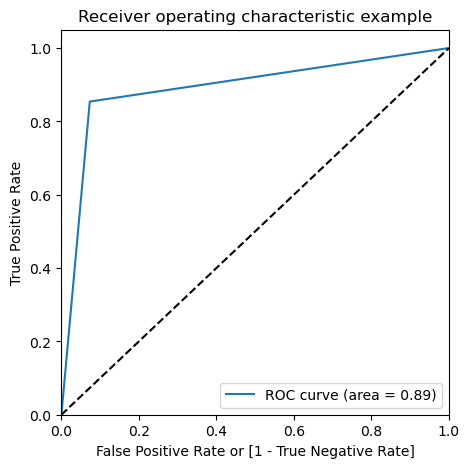

In [338]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
# Calling the function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Predicted )

In [339]:
# Finding optimal value of the cut off
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Pros_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.144260,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.128391,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.001204,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.732922,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.990655,7987,1,1,1,1,1,1,1,1,1,1,1


In [340]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_data = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_data.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_data

,prob,accuracy,sensi,speci
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.618958,0.987735,0.387964
0.2,0.2,0.888679,0.865495,0.903201
0.3,0.3,0.896709,0.865086,0.916517
0.4,0.4,0.898756,0.854047,0.926761
0.5,0.5,0.898756,0.854047,0.926761
0.6,0.6,0.899071,0.854047,0.927273
0.7,0.7,0.898599,0.852412,0.927529
0.8,0.8,0.810266,0.526983,0.987708
0.9,0.9,0.809951,0.525756,0.987964


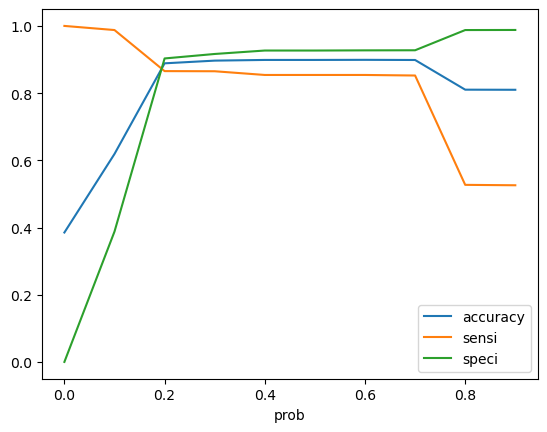

In [345]:
# Plotting it
cutoff_data.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

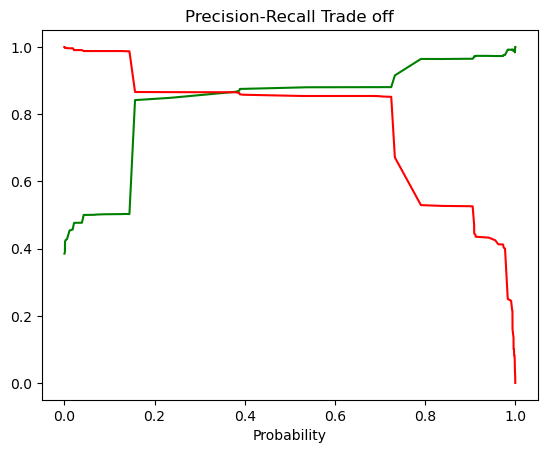

In [347]:
# Precision-Recall Trade off
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.show()

In [349]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Pros_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.144260,3009,1,1,1,0,0,0,0,0,0,0,0,0
1,0,0.128391,1012,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0.001204,9226,1,1,0,0,0,0,0,0,0,0,0,0
3,1,0.732922,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.990655,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [351]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8987561014013541

In [353]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion2)
# Calculating the sensitivity/Recall
print('Recall:',confusion2[1,1]/(confusion2[1,1]+confusion2[1,0])*100)
# Calculating the specificity
print('Specificity:',confusion2[0,0]/(confusion2[0,0]+confusion2[0,1])*100)

[[3619  286]
 [ 357 2089]]
Recall: 85.40474243663124
Specificity: 92.67605633802816


In [355]:
# Prediction on Test Set

In [357]:
X_test = x_test[['Do Not Email_Yes', 'Lead Origin_Lead Add Form','Lead Source_Welingak Website', 'Lead Quality_Not Sure','Lead Quality_Worst','What is your current occupation_Working Professional','Last Notable Activity_SMS Sent','Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing','Tags_switched off']]

In [359]:
x_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(x_test_sm)
y_test_data = pd.DataFrame(y_test)
y_test_pred_data = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_data['Prospect ID'] = y_test_data.index

y_predicted_final = pd.concat([y_test_data.reset_index(drop=True), y_test_pred_data.reset_index(drop=True)],axis=1)
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.4 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x*100))

y_predicted_final.head()

,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,3271,0.144260,0,14
1,1,1490,0.905405,1,91
2,0,7936,0.144260,0,14
3,1,4216,0.998954,1,100
4,0,3830,0.144260,0,14


In [361]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_predicted_final.Converted, y_predicted_final.final_predicted)

0.8920308483290489

In [363]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_predicted_final.Converted, y_predicted_final.final_predicted )
print(confusion)
# Calculating the sensitivity/ Recall
print('Recall:',confusion[1,1]/(confusion[1,1]+confusion[1,0])*100)
# Calculating the specificity
print('specificity:',confusion[0,0]/(confusion[0,0]+confusion[0,1])*100)

[[1602  132]
 [ 162  827]]
Recall: 83.61981799797775
specificity: 92.38754325259517
